# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
!pip install sklearn
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
penguins=load_penguins()
penguins.head()

In [ ]:
penguins=pd.get_dummies(penguins)
penguins=penguins.dropna()
penguins.head()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [19]:
# Code Here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linear_model1=LinearRegression()
X1=penguins[['bill_length_mm','flipper_length_mm','body_mass_g']]
y1=penguins['bill_depth_mm']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=.25)
lr_fit1=linear_model1.fit(X1_train, y1_train)
y_pred_train_1=lr_fit1.predict(X1_train)
y_pred_test_1=lr_fit1.predict(X1_test)
mse_train_1=mean_squared_error(y1_train, y_pred_train_1)
mse_test_1=mean_squared_error(y1_test, y_pred_test_1)

In [20]:
linear_model2=LinearRegression()
X2=penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap',]]
y2=penguins['bill_depth_mm']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=.25)
lr_fit2=linear_model2.fit(X2_train, y2_train)
y_pred_train_2=lr_fit2.predict(X2_train)
y_pred_test_2=lr_fit2.predict(X2_test)
mse_train_2=mean_squared_error(y2_train, y_pred_train_2)
mse_test_2=mean_squared_error(y2_test, y_pred_test_2)

In [21]:
linear_model3=LinearRegression()
X3=penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'island_Biscoe', 'island_Dream']]
y3=penguins['bill_depth_mm']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=.25)
lr_fit3=linear_model3.fit(X3_train, y3_train)
y_pred_train_3=lr_fit3.predict(X3_train)
y_pred_test_3=lr_fit3.predict(X3_test)
mse_train_3=mean_squared_error(y3_train, y_pred_train_3)
mse_test_3=mean_squared_error(y3_test, y_pred_test_3)

In [22]:
linear_model4=LinearRegression()
X4=penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'island_Biscoe', 'island_Dream',\
             'sex_female']]
y4=penguins['bill_depth_mm']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size=.25)
lr_fit4=linear_model4.fit(X4_train, y4_train)
y_pred_train_4=lr_fit4.predict(X4_train)
y_pred_test_4=lr_fit4.predict(X4_test)
mse_train_4=mean_squared_error(y4_train, y_pred_train_4)
mse_test_4=mean_squared_error(y4_test, y_pred_test_4)

In [25]:
mse_train=[[3,5,7,8], [mse_train_1, mse_train_2, mse_train_3, mse_train_4]]
mse_test=[[3,5,7,8], [mse_test_1, mse_test_2, mse_test_3, mse_test_4]]
df_mse_train=pd.DataFrame(mse_train).transpose()
df_mse_test=pd.DataFrame(mse_test).transpose()
df_mse_train.columns=['Number of Variables','MSE Train']
df_mse_test.columns=['Number of Variables','MSE Test']
df_mse=df_mse_train.merge(df_mse_test, on=['Number of Variables'])
df_mse

,Number of Variables,MSE Train,MSE Test
0,3.0,2.241676,2.931183
1,5.0,0.708104,0.688202
2,7.0,0.691668,0.719072
3,8.0,0.562689,0.829996


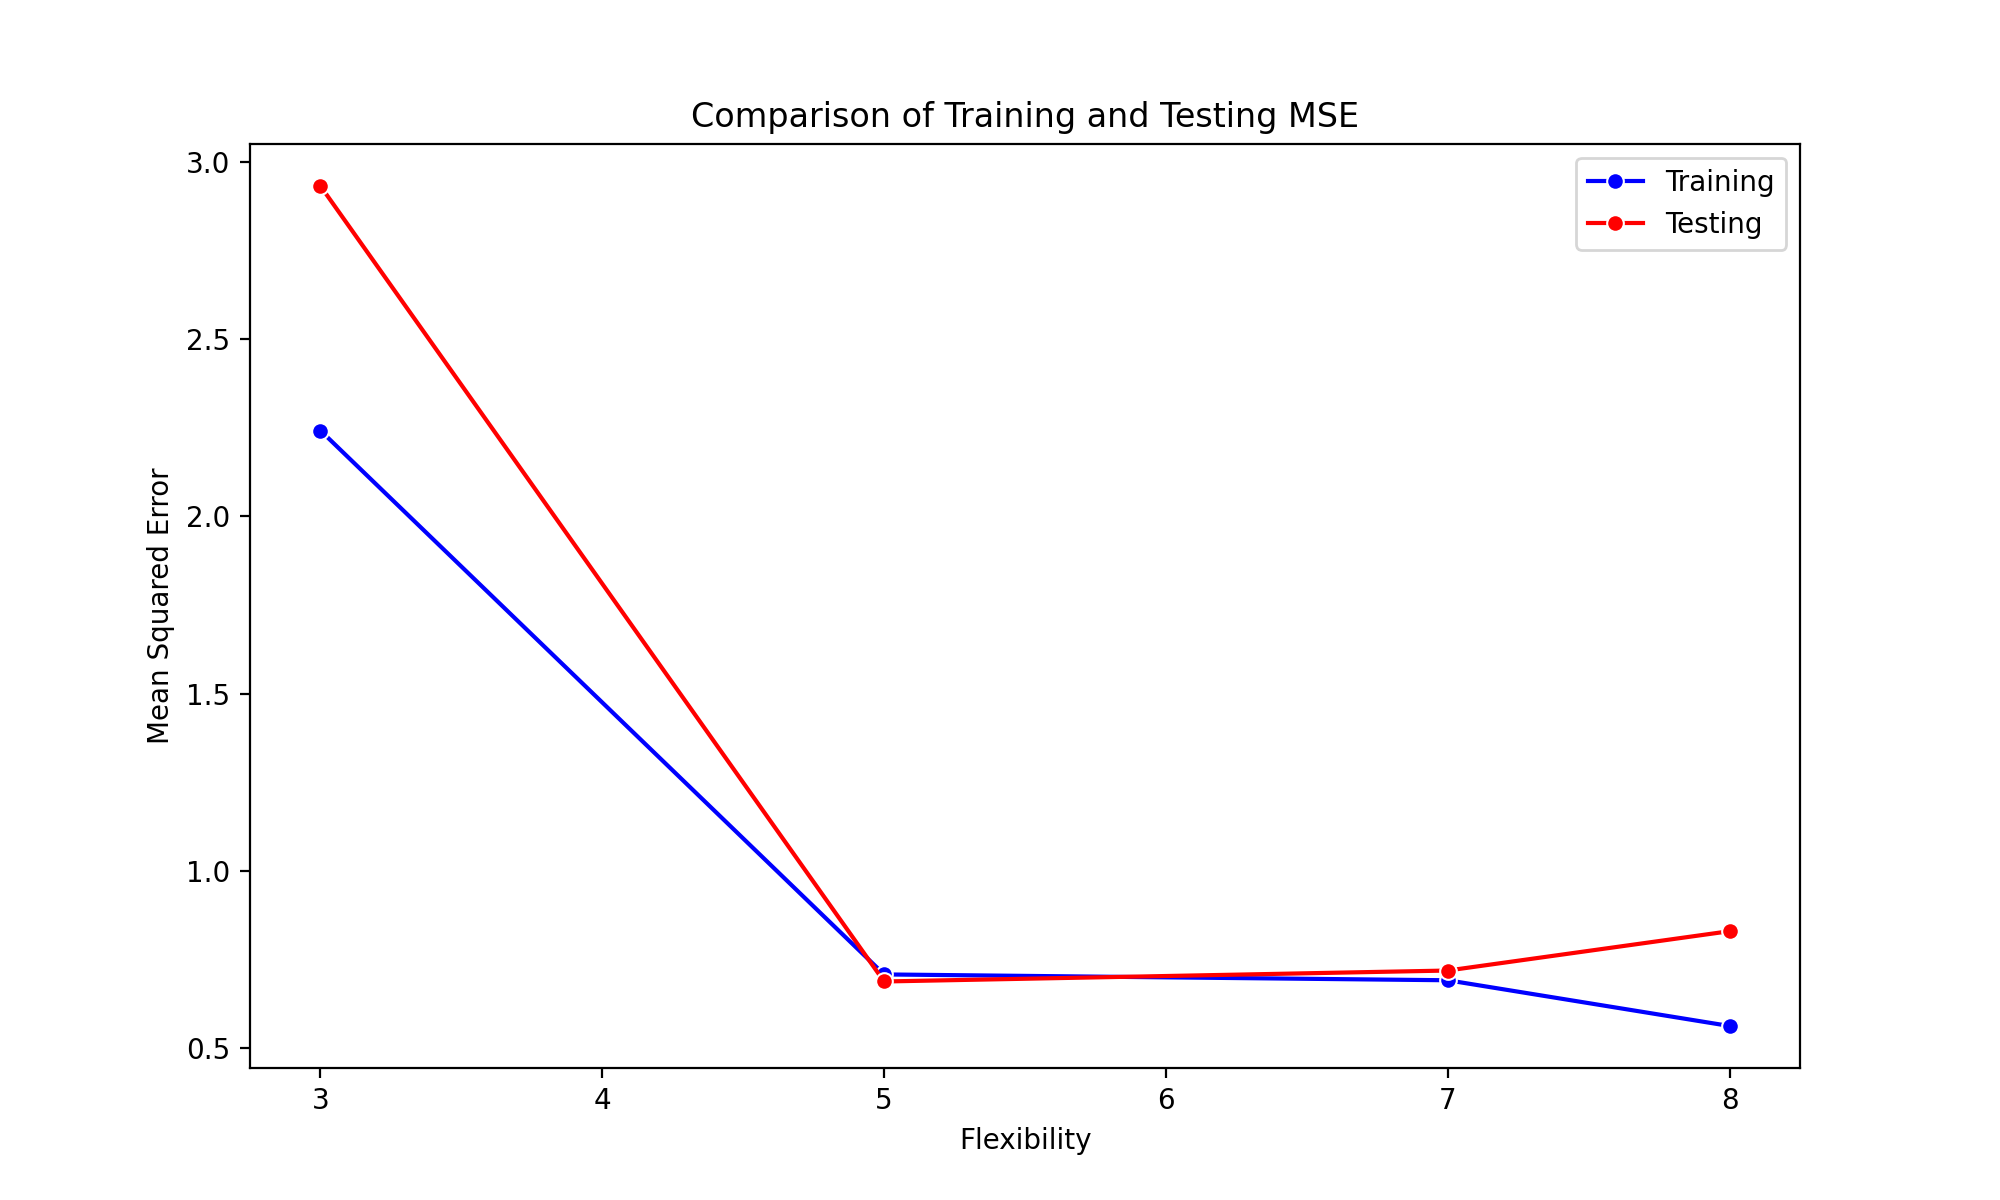

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Variables', y='MSE Train', data=df_mse, label='Training', marker='o', color='blue')
sns.lineplot(x='Number of Variables', y='MSE Test', data=df_mse, label='Testing', marker='o', color='red')
plt.title("Comparison of Training and Testing MSE")
plt.xlabel("Flexibility")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()